In [6]:
import pandas as pd
import numpy as np
import xarray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data_path_1 = "/home/papalio/test_research/python_edu/class0/example_0913/"
data_path_2 = "/home/papalio/test_research/python_edu/class0/example_0914/"



Exercise 8-1. 주어진 위도(SSP_LAT.bin), 경도(SSP_LON.bin), 지형고도(SSP_Orography.bin) 자료를 읽고DataArray로 변환한 후, Dataset으로 합쳐 NetCDF(.nc) 형식으로 저장해보세요(ny=601, nx=751 / 원래자료는 ny*nx의 2차원 자료).


In [7]:
file_LAT ='SSP_LAT.bin' #위도
file_LON='SSP_LON.bin' #경도
file_Orgraphy = 'SSP_Orography.bin' #지형고도

ny = 601
nx = 751

lon = np.fromfile(data_path_1+file_LAT).reshape(ny,nx)
lat = np.fromfile(data_path_1+file_LON).reshape(ny,nx)
orog = np.fromfile(data_path_1+file_Orgraphy).reshape(ny,nx)

dims = ['ny','nx']
coords = [np.arange(ny), np.arange(nx)]

lon_da = xarray.DataArray(lon, dims=dims, coords=coords, name='LON')
lat_da = xarray.DataArray(lat, dims=dims, coords=coords, name='LAT')
orog_da = xarray.DataArray(orog, dims=dims, coords=coords, name='orog')

ds = xarray.merge([lon_da, lat_da, orog_da])
ds.to_netcdf('./exercise_8_1_output_lyj.nc')

In [8]:
# 생성한 nc 파일 확인
ds

<xarray.Dataset> Size: 11MB
Dimensions:  (ny: 601, nx: 751)
Coordinates:
  * ny       (ny) int64 5kB 0 1 2 3 4 5 6 7 ... 593 594 595 596 597 598 599 600
  * nx       (nx) int64 6kB 0 1 2 3 4 5 6 7 ... 743 744 745 746 747 748 749 750
Data variables:
    LON      (ny, nx) float64 4MB 33.0 33.0 33.0 33.0 ... 39.0 39.0 39.0 39.0
    LAT      (ny, nx) float64 4MB 124.5 124.5 124.5 124.5 ... 132.0 132.0 132.0
    orog     (ny, nx) float64 4MB nan nan nan nan nan ... nan nan nan nan nan

In [10]:
# nc 데이터 읽는법
file = 'exercise_8_1_output_lyj.nc'
test_path = '/home/papalio/test_research/python_edu_LYJ/'
ds = xarray.open_dataset(test_path+file)

ds

<xarray.Dataset> Size: 11MB
Dimensions:  (ny: 601, nx: 751)
Coordinates:
  * ny       (ny) int64 5kB 0 1 2 3 4 5 6 7 ... 593 594 595 596 597 598 599 600
  * nx       (nx) int64 6kB 0 1 2 3 4 5 6 7 ... 743 744 745 746 747 748 749 750
Data variables:
    LON      (ny, nx) float64 4MB ...
    LAT      (ny, nx) float64 4MB ...
    orog     (ny, nx) float64 4MB ...

In [13]:
import xarray as xr
import matplotlib.pyplot as plt

# 데이터 읽기
file = 'exercise_8_1_output_lyj.nc'
test_path = '/home/papalio/test_research/python_edu_LYJ/'
img_path = '/home/papalio/test_research/python_edu_LYJ/img/'  # 이미지 저장 경로
ds = xr.open_dataset(test_path + file)



# 지형고도 (orog) 시각화 및 저장
plt.figure(figsize=(8, 6))
plt.pcolormesh(ds['orog'], cmap='terrain')
plt.colorbar(label='Orography (Height)')
plt.title('Orography')
plt.xlabel('nx')
plt.ylabel('ny')
plt.savefig(img_path + 'orography_plot.png', dpi=300, bbox_inches='tight')  # 저장
plt.close()


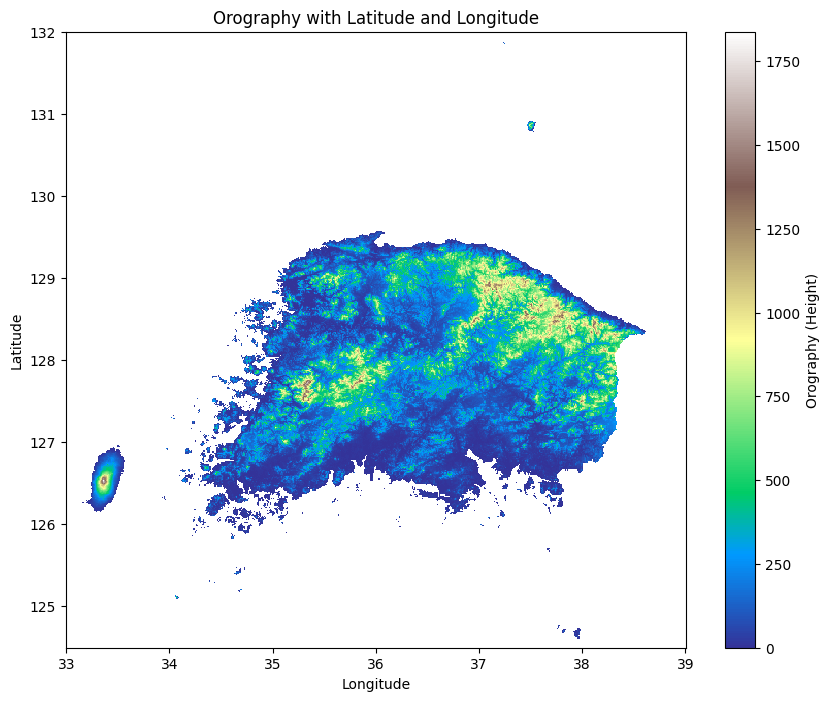

In [14]:
import xarray as xr
import matplotlib.pyplot as plt

# 데이터 읽기
file = 'exercise_8_1_output_lyj.nc'
test_path = '/home/papalio/test_research/python_edu_LYJ/'
img_path = '/home/papalio/test_research/python_edu_LYJ/img/'  # 이미지 저장 경로
ds = xr.open_dataset(test_path + file)

# 위도와 경도를 배경으로 지형고도 시각화
plt.figure(figsize=(10, 8))
plt.pcolormesh(ds['LON'], ds['LAT'], ds['orog'], cmap='terrain', shading='auto')
plt.colorbar(label='Orography (Height)')
plt.title('Orography with Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(img_path + 'orography_with_lat_lon.png', dpi=300, bbox_inches='tight')  # 저장
plt.show()


In [18]:
# Exercise 8-2. 주어진 NetCDF 자료(AR6_SSP585_5ENSMN_skorea_TA_gridraw_daily_2100.nc)를 읽고, 
# 모든경도와 위도에 대해 평균한 시계열 자료를 그래프로 그려보세요. 
data_path_1 = "/home/papalio/test_research/python_edu/class0/example_0913/"
data_nc = "AR6_SSP585_5ENSMN_skorea_TA_gridraw_daily_2100.nc"

ds = xarray.open_dataset(data_path_1+data_nc)
ds

<xarray.Dataset> Size: 659MB
Dimensions:    (time: 365, latitude: 601, longitude: 751)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2100-01-01 2100-01-02 ... 2100-12-31
  * latitude   (latitude) float32 2kB 33.0 33.01 33.02 ... 38.98 38.99 39.0
  * longitude  (longitude) float32 3kB 124.5 124.5 124.5 ... 132.0 132.0 132.0
Data variables:
    TA         (time, latitude, longitude) float32 659MB ...

In [ ]:
#위도 경도 평균 계산
# dim=['longitude', 'latitude']: 위도와 경도 차원을 따라 데이터를 평균화하여 시간(time)에 대한 데이터로 축소.
# ds_ll_mean: 시간에 따른 평균 온도를 나타내는 데이터셋
ds_ll_mean = ds.mean(dim=['longitude','latitude'])


In [21]:
ds_ll_mean

<xarray.Dataset> Size: 4kB
Dimensions:  (time: 365)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2100-01-01 2100-01-02 ... 2100-12-31
Data variables:
    TA       (time) float32 1kB 7.08 7.617 9.013 7.33 ... 4.734 6.545 5.212

In [23]:
dates = pd.DataFrame(ds_ll_mean['time'].values, columns=['TM'])
data = ds_ll_mean['TA']


/tmp/ipykernel_1005/1735023703.py:4: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  x_ticks[dates['TM'].dt.day != 1] = ''
/tmp/ipykernel_1005/1735023703.py:4: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  x_ticks[dates['TM'].dt.day != 1] = ''


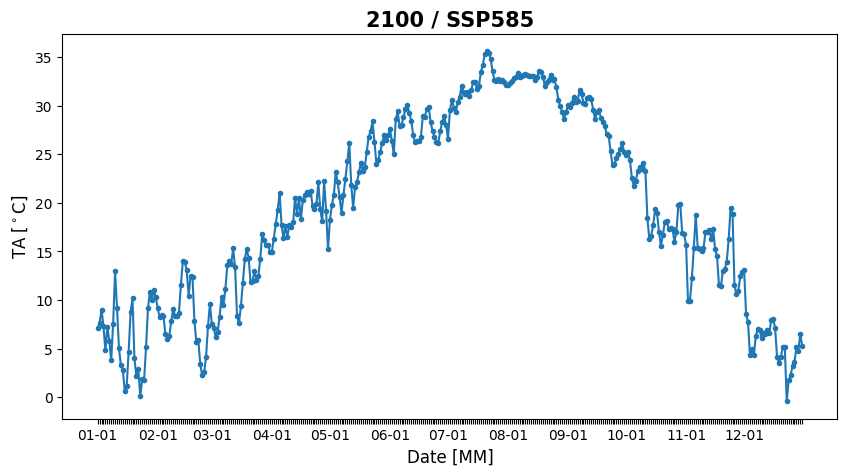

In [24]:
fig = plt.figure(figsize=(10,5))
plt.plot(dates['TM'].values, data, marker='.')
x_ticks = dates['TM'].dt.strftime('%m-%d')
x_ticks[dates['TM'].dt.day != 1] = ''
plt.xticks(dates['TM'].values, labels=x_ticks)
plt.title('2100 / SSP585', fontsize=15, fontweight='bold')
plt.xlabel('Date [MM]', fontsize=12)
plt.ylabel('TA [$^\circ$C]', fontsize=12)
plt.savefig('/home/papalio/test_research/python_edu_LYJ/img/exercise_8_2.png')


# Exercise 8-3
Basemap을 활용하여 동북아시아(중국,일본,한국 포함), 한반도, 우리나라, 제주도에 대해각각지도를 그리고 한 그림에 4개의 그래프가 표현되도록 저장해보세요(plt.subplots, basemap 활용).


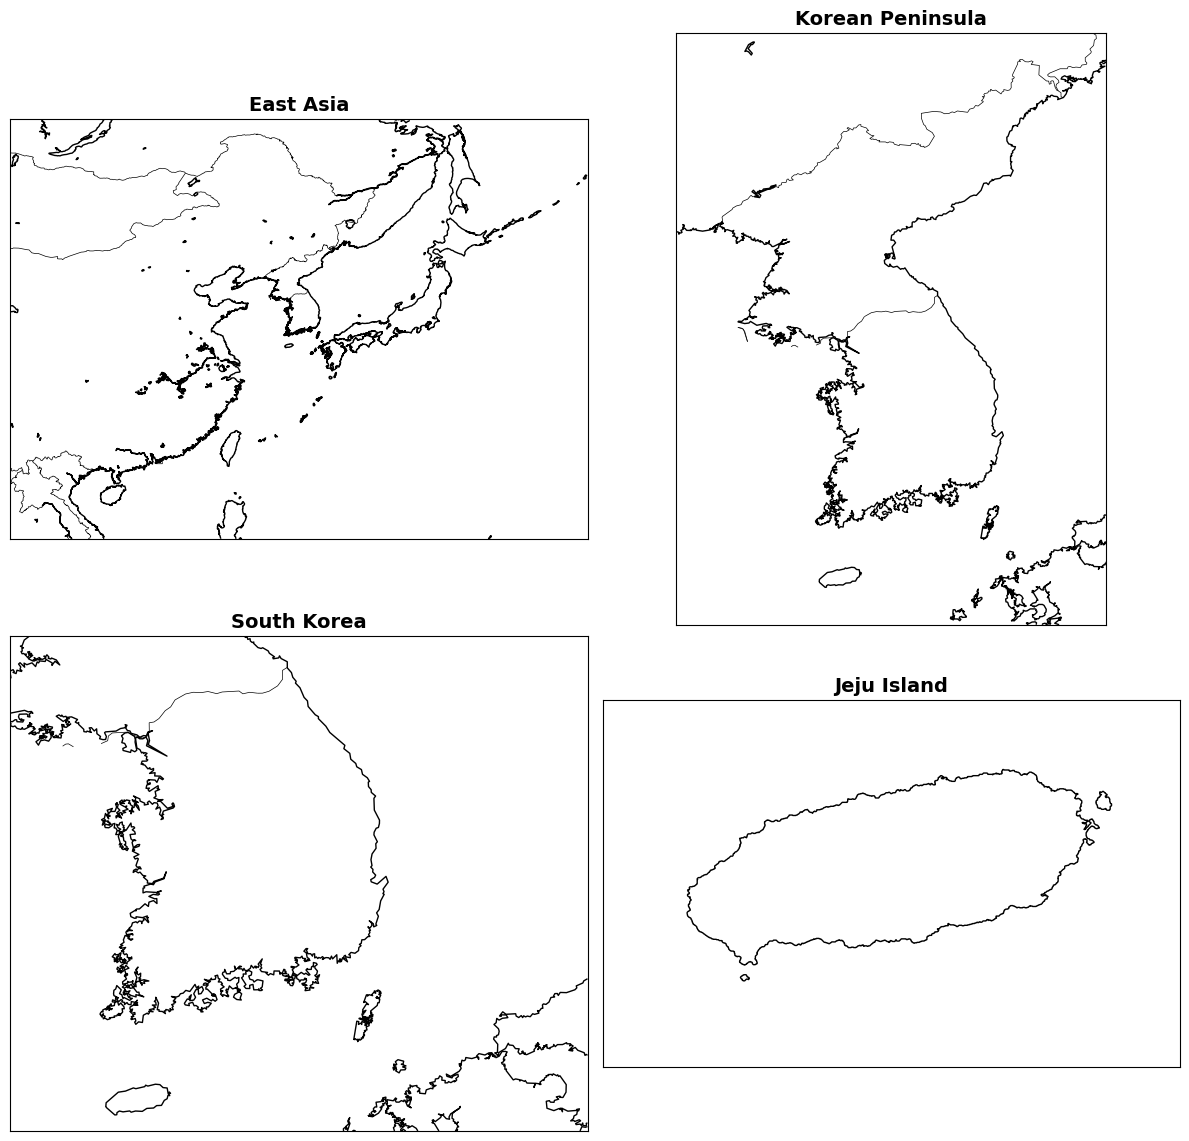

<Figure size 640x480 with 0 Axes>

In [27]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt



# 서브플롯 생성
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

# 동아시아 지도
m_ea = Basemap(projection='cyl', resolution='i', 
               llcrnrlon=100, urcrnrlon=155, llcrnrlat=15, urcrnrlat=55, ax=axes[0, 0])
m_ea.drawcoastlines()
m_ea.drawcountries()
axes[0, 0].set_title('East Asia', fontsize=14, fontweight='bold')

# 한반도 지도
m_kp = Basemap(projection='cyl', resolution='i', 
               llcrnrlon=123.5, urcrnrlon=131.5, llcrnrlat=32.5, urcrnrlat=43.5, ax=axes[0, 1])
m_kp.drawcoastlines()
m_kp.drawcountries()
axes[0, 1].set_title('Korean Peninsula', fontsize=14, fontweight='bold')

# 남한 지도
m_sk = Basemap(projection='cyl', resolution='i', 
               llcrnrlon=125, urcrnrlon=132, llcrnrlat=33, urcrnrlat=39, ax=axes[1, 0])
m_sk.drawcoastlines()
m_sk.drawcountries()
axes[1, 0].set_title('South Korea', fontsize=14, fontweight='bold')

# 제주도 지도
m_jeju = Basemap(projection='cyl', resolution='f', 
                 llcrnrlon=126, urcrnrlon=127.1, llcrnrlat=33, urcrnrlat=33.7, ax=axes[1, 1])
m_jeju.drawcoastlines()
axes[1, 1].set_title('Jeju Island', fontsize=14, fontweight='bold')

# 축 제거 (서브플롯 간 불필요한 눈금 제거)
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# 레이아웃 조정 및 이미지 저장
plt.tight_layout()
plt.savefig('./exercise_8_3_improved.png', dpi=300, bbox_inches='tight')
plt.show()



Exercise 8-4. 주어진 NetCDF 자료(AR6_SSP585_5ENSMN_skorea_TA_gridraw_daily_2100.nc)를 읽고, 모든기간에 대해 평균한 격자 자료를 공간분포로 그려보세요(basemap, plt.pcolormesh 활용).

In [28]:
data_nc = "AR6_SSP585_5ENSMN_skorea_TA_gridraw_daily_2100.nc"
ds = xarray.open_dataset(data_path_1+data_nc)
ds

<xarray.Dataset> Size: 659MB
Dimensions:    (time: 365, latitude: 601, longitude: 751)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2100-01-01 2100-01-02 ... 2100-12-31
  * latitude   (latitude) float32 2kB 33.0 33.01 33.02 ... 38.98 38.99 39.0
  * longitude  (longitude) float32 3kB 124.5 124.5 124.5 ... 132.0 132.0 132.0
Data variables:
    TA         (time, latitude, longitude) float32 659MB ...

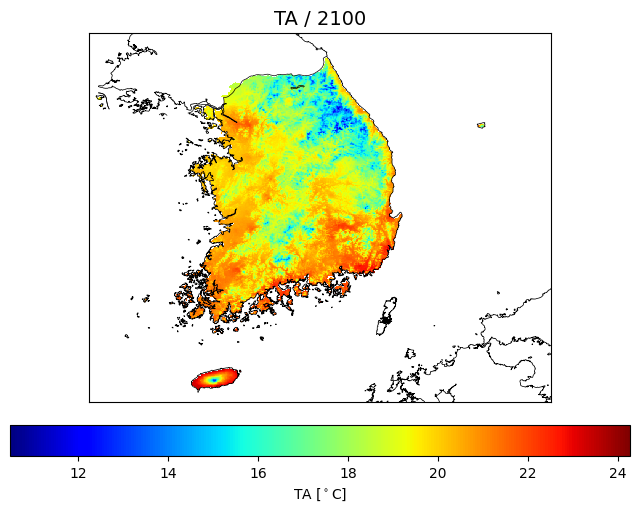

In [29]:
# 모든 기간에 대해 평균한 격자 자료를 공간 분포로.
# 먼저 모든 기간에 대해 평균 구하기

ds_t_mean = ds.mean(dim='time')

lon = ds['longitude'].values
lat = ds['latitude'].values
data = ds_t_mean['TA']

fig = plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='f', llcrnrlon=lon.min(), urcrnrlon=lon.max(), llcrnrlat=lat.min(), urcrnrlat=lat.max())
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)

LON, LAT = np.meshgrid(lon, lat)

plot = m.pcolormesh(LON, LAT, data, cmap='jet', shading='nearest')
plt.colorbar(plot, location='bottom', orientation='horizontal', pad=0.05, label='TA [$^\circ$C]')

plt.title('TA / 2100', fontsize=14)

plt.savefig('./exercise_8_4.png')